Import important python libraries

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Read loan csv file into Jupyter

In [23]:
df = pd.read_csv("loan.csv")

In [24]:
#Checking shape of dataset to see number of rows and columns
df.shape

(39717, 111)

There are 39717 rows and 111 columns in the given loan dataset

In [25]:
#Checking shape of dataset to see number of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [26]:
#Checking data types of columns
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [27]:
#Checking few records from the top
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Cleaning up columns for computability

In [28]:
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.rstrip('%'))) 
df['term'] = df['term'].apply(lambda x: int(x.rstrip(' months'))) 

In [29]:
#Checking few records from the top again
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Checking the mean percentage of null values in every column

In [30]:
pd.options.display.max_rows = 150
round(100*df.isnull().mean(),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.59
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

As seen above, many columns have 90 percent or above null values. 

Let's segregate the columns into numeric, categorical, date and extra columns to be able to prioritize important ones
and drop unnecessary columns

In [31]:
extra_cols=['id','pymnt_plan','url','desc','earliest_cr_line','mths_since_last_delinq','mths_since_last_record','revol_bal'
           ,'revol_util','initial_list_status','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d'
            ,'mths_since_last_major_derog','policy_code','tot_coll_amt','tot_cur_bal','open_il_6m','open_il_12m','open_il_24m'
            ,'mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util'
            ,'total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy'
            ,'bc_util','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op'
            ,'mo_sin_rcnt_rev_tl_op'
            ,'mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq'
            ,'mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats'
            ,'num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m'
            ,'num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75'
            ,'pub_rec_bankruptcies','tax_liens','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit'
            ,'total_il_high_credit_limit','open_acc_6m','verification_status_joint','dti_joint','annual_inc_joint'
           ,'total_rec_late_fee','recoveries','collection_recovery_fee',
          'collections_12_mths_ex_med','acc_now_delinq']

num_cols=['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','emp_length','annual_inc','dti','delinq_2yrs'
         ,'inq_last_6mths','open_acc','pub_rec','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv'
         ,'total_rec_prncp','total_rec_int']

cat_cols=['term','grade','emp_title','home_ownership','verification_status','loan_status','purpose','title','zip_code'
          ,'addr_state','application_type',]
          
date_cols=['issue_d']

Let's <b>drop columns</b> which are mostly null values and are NOT needed for analysis

In [32]:
df = df.drop(columns=extra_cols,axis=1)

In [33]:
#Checking null proportion in dataset again
pd.options.display.max_rows = 150
round(100*df.isnull().mean(),2)

member_id              0.00
loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_title              6.19
emp_length             2.71
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
title                  0.03
zip_code               0.00
addr_state             0.00
dti                    0.00
delinq_2yrs            0.00
inq_last_6mths         0.00
open_acc               0.00
pub_rec                0.00
total_acc              0.00
out_prncp              0.00
out_prncp_inv          0.00
total_pymnt            0.00
total_pymnt_inv        0.00
total_rec_prncp        0.00
total_rec_int          0.00
application_type       0.00
dtype: float64

<b>Imputing missing values</b> in emp_title and emp_length columns

In [34]:
mode_emp_length = df['emp_length'].mode() #Checking most frequent value
df['emp_length'] = df['emp_length'].fillna(mode_emp_length) #imputation

mode_emp_title = df['emp_title'].mode() #Checking most frequent value
df['emp_title'] = df['emp_title'].fillna(mode_emp_title)

In [18]:
#Checking null proportion in dataset again
pd.options.display.max_rows = 150
round(100*df.isnull().mean(),2)

id                     0.00
member_id              0.00
loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_title              6.19
emp_length             2.71
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
title                  0.03
zip_code               0.00
addr_state             0.00
dti                    0.00
delinq_2yrs            0.00
inq_last_6mths         0.00
open_acc               0.00
pub_rec                0.00
total_acc              0.00
out_prncp              0.00
out_prncp_inv          0.00
total_pymnt            0.00
total_pymnt_inv        0.00
total_rec_prncp        0.00
total_rec_int          0.00
application_type       0.00
dtype: float64

We're equipped with <b>clean</b> and <b>complete</b> data to proceed with <b>Exploratory Data Analysis</b> now

<b>Deriving</b> month and year values from issue date column for better analysis

In [38]:
df['issue_mon'] = df['issue_d'].str[0:3] #Extracting issue month
df['issue_yr'] = df['issue_d'].str[4:6] #Extracting issue yr
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,application_type,issue_mon,issue_yr
0,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,US Army,...,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,INDIVIDUAL,Dec,11
1,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,...,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,INDIVIDUAL,Dec,11
2,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,...,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,INDIVIDUAL,Dec,11
3,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,INDIVIDUAL,Dec,11
4,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,...,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,INDIVIDUAL,Dec,11


In [37]:
# Checking the spread of data across various features 
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,8.504636e+05,11219.443815,10947.713196,10397.448868,42.418007,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172
std,2.656783e+05,7456.670694,7187.238670,7128.450439,10.622815,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964
min,7.069900e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.667800e+05,5500.000000,5400.000000,5000.000000,36.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000
50%,8.508120e+05,10000.000000,9600.000000,8975.000000,36.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000
75%,1.047339e+06,15000.000000,15000.000000,14400.000000,60.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000
max,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000


pub_rec column indicating public derogatory mostly has 0 value except few outlier. It does NOT indicate 
a strong tendency for loan default

<b>Dependent variable</b> is <b>loan_status</b>. Let's see its spread in the data in this <b>univariate</b> plot

<Axes: xlabel='loan_status'>

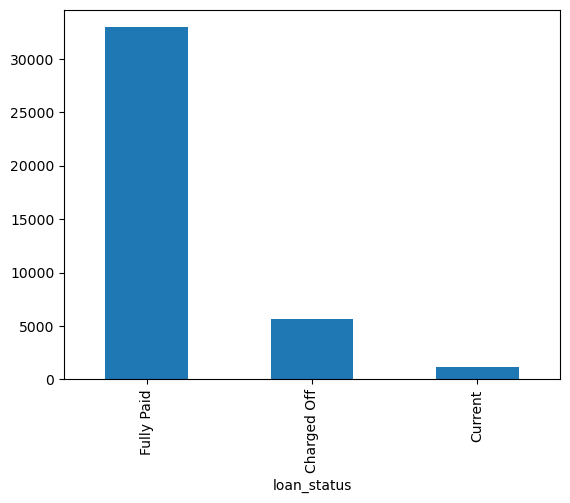

In [39]:
df['loan_status'].value_counts().plot.bar() #Dependent variable

As seen above, there's signicant chunk of loan records in Charged Off status. We want to understand which features 
affect status the most.

First, let's make this a numeric value for analysis

In [41]:
df['loan_status_flag'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
df['loan_status_flag'].value_counts()

loan_status_flag
0    34090
1     5627
Name: count, dtype: int64

So, there are 5627 loan applicants as Charged Off i.e. which defaulted on loan payments

Checking spread of loan status across different <b>issuance years</b>

<Axes: xlabel='issue_yr'>

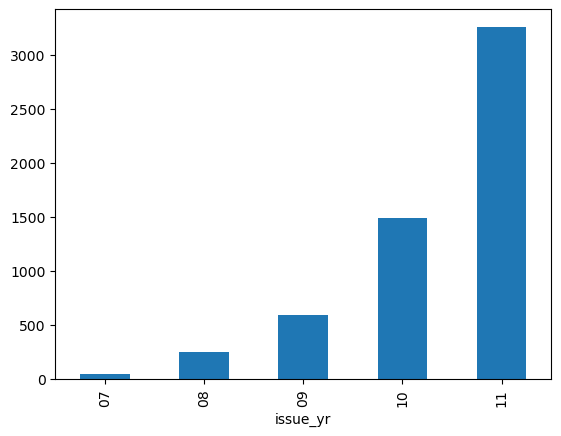

In [51]:
df['loan_status_flag'].groupby(df['issue_yr']).sum().plot.bar()

Loans issued in year <b>2010-11</b> defaulted more than others

Checking spread of loan status across different <b>term</b> values

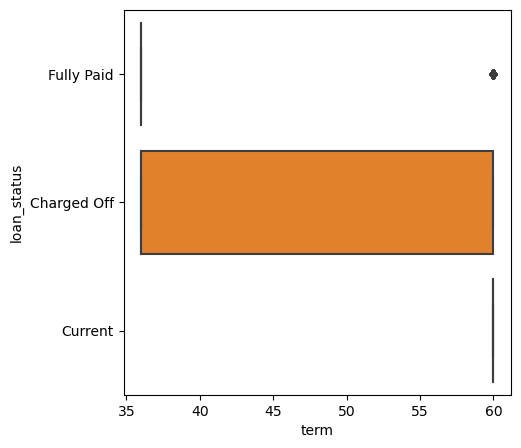

In [59]:
plt.figure(figsize=(5,5)) 
sns.boxplot(x=df['term'], y=df['loan_status'])
plt.show()

Most Charged Off loans are issued between 35-60 months of term

Checking <b>employment length</b> spread of loan customers

<Axes: xlabel='emp_length'>

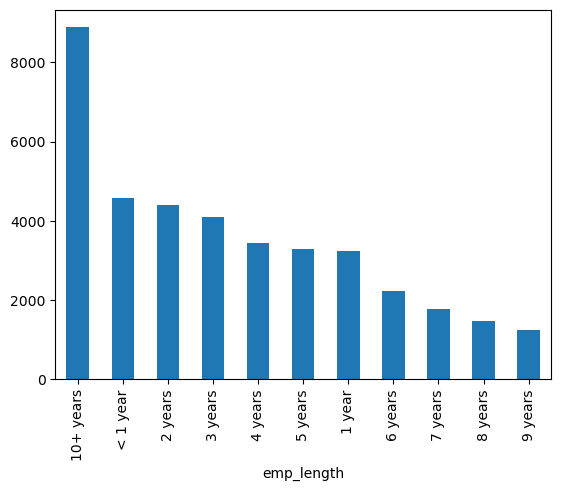

In [56]:
df['emp_length'].value_counts().plot.bar()

Most customers are employed for more than 10 years

Checking spread of <b>purpose of loan</b> against loan status

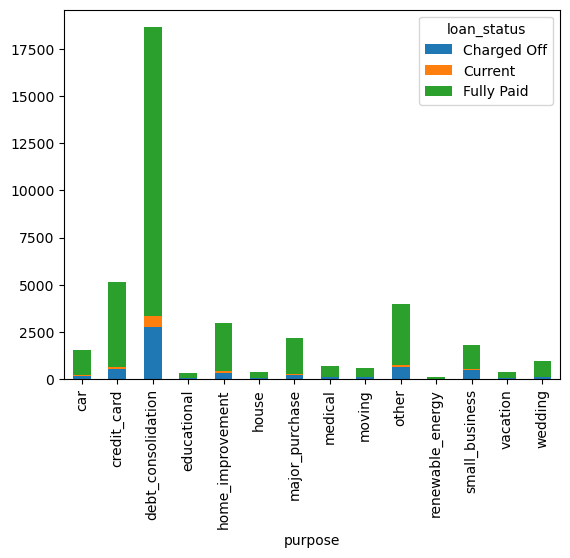

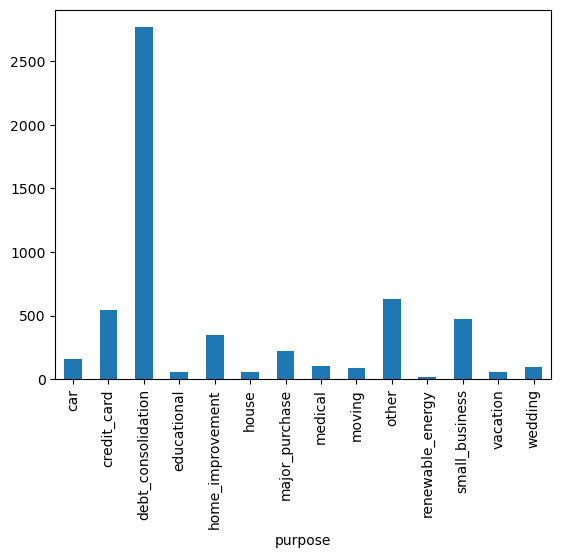

In [46]:
stacked = pd.crosstab(index=df['purpose'], columns=df['loan_status'])
stacked.plot(kind='bar', stacked=True)
plt.show()

purpose_wise_dist = df['loan_status_flag'].groupby(df['purpose']).sum()
purpose_wise_dist.plot(kind='bar', stacked=True)
plt.show()

Other than debt consolidation and Other purpose loans, <b>Credit card</b> purpose loans seem to be charged off more often
followed <b>Small business</b>

Checking if <b>loan amount</b> affects <b>loan repayment</b> behaviour in following <b>bivariate</b> box plot

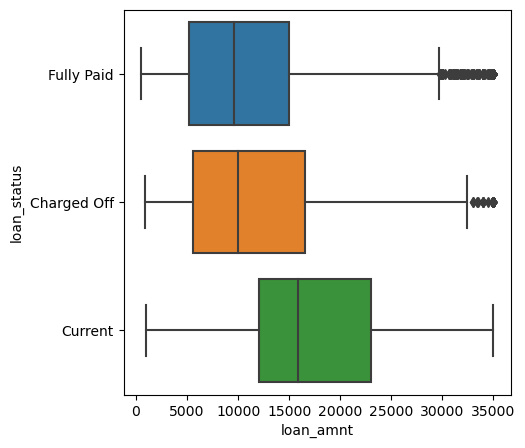

In [42]:
plt.figure(figsize=(5,5)) 
sns.boxplot(x=df['loan_amnt'], y=df['loan_status'])
plt.show()

There is no strong relationship between loan amount and loan status variables. Chargdd Off loan amounts 
are in similar range as the Fully Paid loans

In [47]:
#Checking application type
df['application_type'].value_counts() 

application_type
INDIVIDUAL    39717
Name: count, dtype: int64

Checking if <b>home ownership</b> affects loan status

<Axes: xlabel='home_ownership'>

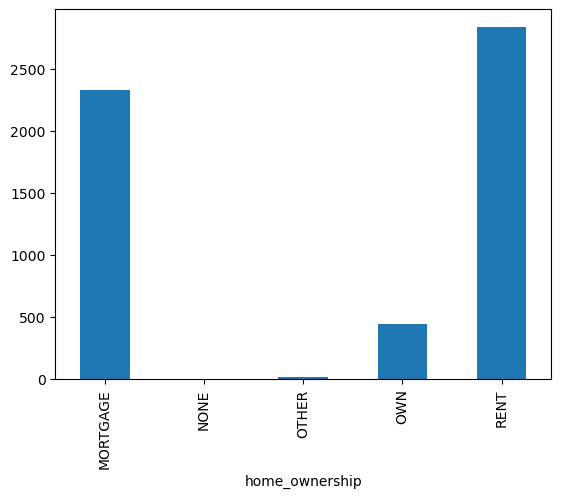

In [49]:
home_own_dist = df['loan_status_flag'].groupby(df['home_ownership']).sum()
home_own_dist.plot(kind='bar', stacked=True)

Loan applicants living in <b>rented or mortage</b> homes tend to default more than others

Checking distribution of loan defaulters across <b>states</b>

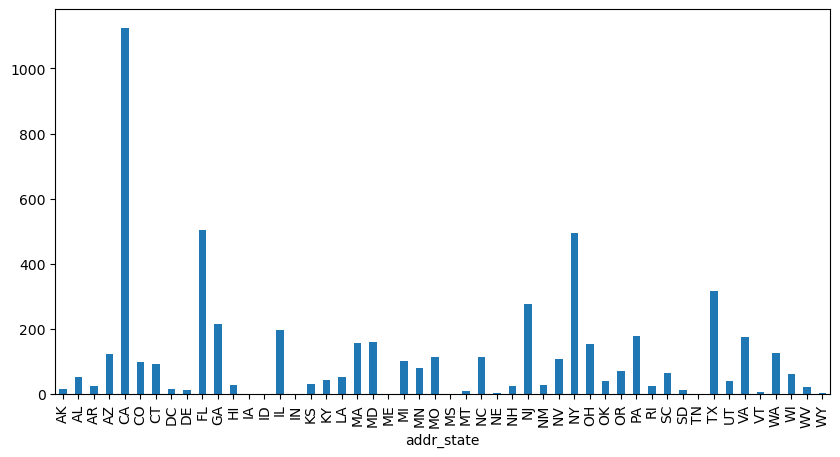

In [53]:
plt.figure(figsize=(10,5)) 
state_dist = df['loan_status_flag'].groupby(df['addr_state']).sum()
state_dist.plot(kind='bar', stacked=True) 
plt.show()

<b>State California(CA)</b> have most loan charged off followed by <b>Florida(FL)</b> and <b>New York(NY)</b>

Checking if there is any <b>correlation</b> between <b>interest rates,loan amount, term, annual income, debt to income ratio
and loan status</b> using the following heatmap

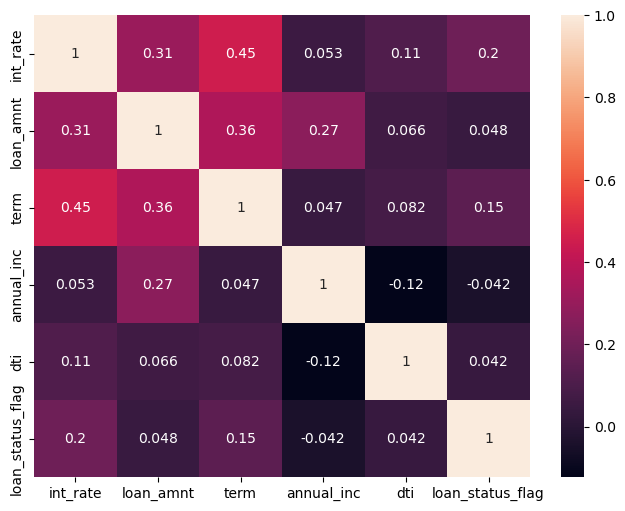

In [55]:
plt.figure(figsize=(8,6)) 
sns.heatmap(df[["int_rate","loan_amnt","term","annual_inc","dti","loan_status_flag"]].corr(),annot=True) 
plt.show()

There is no strong correlation observed between the variables.

# Summary & Recommendations

Most of the Lending Club's loan customers are <b>employed</b> for <b>more than 10 years.</b>  

Most Charged Off loans were <b>issued</b> in the year <b>2010-11.</b>  
There can be further enquiries into those two years' records.  

Most Charged Off loans are issued for <b>35-60 months</b> of <b>term.</b>  
Higher loan terms applications should be more scrutinized.  

Other than debt consolidation and Other purpose loans, <b>Credit card</b> purpose loans seem to be charged off 
more often followed <b>Small business.</b>  
Hence, credit card and small business loan maybe charged with higher interest rates.  

Loan applicants living in <b>rented</b> or <b>mortage</b> homes tend to default more than others.  
Hence, these applications may be requested to have collateral support to mitigate risk.  

<b>State California(CA)</b> have most loan charged off followed by Florida(FL) and New York(NY).  
Loan applications in these states maybe charged with marginally higher interest rates than others.